<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 9: Neural Network Basics
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

In [12]:
import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Input data

In [2]:
# Input array
X = np.array([
  [1, 0, 1, 0],
  [1, 0, 1, 1],
  [0, 1, 0, 1]
])

# Output
y = np.array([
  [1],
  [1],
  [0]
])

In [3]:
#new set of data
X = np.random.binomial(1, 0.7, (100, 7))
y = np.random.binomial(1, 0.5, (X.shape[0], 1))

input_layer_size = X.shape[1]
hidden_layer_1_size = 5

## Functions

In [4]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU Function
def relu(x):
    return np.max(0, x)

# Derivative of ReLU Function
def relu_derivative(x):
    return 0 if x < 0 else 1

## Variable initialization

In [5]:
# Setting training iterations
epoch = 1000  #one epoch represents forward and back propagation of all the data once
# Setting learning rate 
lr = 0.1
# number of features in data set
input_layer_size = X.shape[1] #input size = 4 cause you have 4 features
# number of hidden layers neurons
hidden_layer_1_size = 3 #3 neurons in the hidden layer 
# number of neurons at output layer
output_layer_size = 1 #label

### Weights and Bias

In [6]:
# weight and bias initialization
wh1 = np.random.uniform(size = (input_layer_size, hidden_layer_1_size))
bh1 = np.random.uniform(size = (1, hidden_layer_1_size))
wout = np.random.uniform(size = (hidden_layer_1_size, output_layer_size))
bout = np.random.uniform(size = (1, output_layer_size))

## Calculation

In [7]:
cost = []
for i in range(epoch):
    # Forward Propagation
    hidden_layer_1 = np.dot(X, wh1)
    hidden_layer_1 = hidden_layer_1 + bh1
    hidden_layer_1_activation = sigmoid(hidden_layer_1)
    
    output_layer = np.dot(hidden_layer_1_activation, wout)
    output_layer = output_layer + bout
    
    output = sigmoid(output_layer)

    # Backpropagation
    E = y - output
    cost.append(np.square(E).sum())
    
    slope_output_layer = sigmoid_derivative(output)
    d_output = E * slope_output_layer
    
    error_hidden_layer_1 = d_output.dot(wout.T)
    slope_hidden_layer_1 = sigmoid_derivative(hidden_layer_1_activation)
    d_hidden_layer_1 = error_hidden_layer_1 * slope_hidden_layer_1
    
    wout += hidden_layer_1_activation.T.dot(d_output) * lr
    bout += np.sum(d_output,  axis = 0, keepdims = True) * lr
    wh1 += X.T.dot(d_hidden_layer_1) * lr
    bh1 += np.sum(d_hidden_layer_1,  axis = 0, keepdims = True) * lr
    print('epoch: {}, cost: {}'.format(i,np.square(E).sum()))

epoch: 0, cost: 46.80156003789096
epoch: 1, cost: 32.78535688214182
epoch: 2, cost: 27.737102720766245
epoch: 3, cost: 25.704244085922532
epoch: 4, cost: 25.90046302935449
epoch: 5, cost: 25.566337343149577
epoch: 6, cost: 25.74797527783266
epoch: 7, cost: 25.495509350873093
epoch: 8, cost: 25.665969665553337
epoch: 9, cost: 25.451044127236642
epoch: 10, cost: 25.6126231848393
epoch: 11, cost: 25.41900538183047
epoch: 12, cost: 25.57303059692242
epoch: 13, cost: 25.393364422093576
epoch: 14, cost: 25.540608126614146
epoch: 15, cost: 25.37117233593729
epoch: 16, cost: 25.512099602336384
epoch: 17, cost: 25.350878883899195
epoch: 18, cost: 25.485784456427282
epoch: 19, cost: 25.331631745222797
epoch: 20, cost: 25.460715865467275
epoch: 21, cost: 25.312948711212783
epoch: 22, cost: 25.43635969120829
epoch: 23, cost: 25.29455209580815
epoch: 24, cost: 25.412410533867483
epoch: 25, cost: 25.276280563293408
epoch: 26, cost: 25.38869324037672
epoch: 27, cost: 25.25804038213146
epoch: 28, cost

## Results

In [8]:
ii = range(len(y))
yy = y.flatten()
oo = output.flatten()
ab = np.abs(oo - yy)
bo = np.array([0 if oi < 0.5 else 1 for oi in oo])
tt = ['Yes' if ti else 'No' for ti in (yy == bo)]

print('index Expect Output Error Binary Correct')
print('----- ------ ------ ----- ------ -------')
ima = int((0.9 * len(yy)))
imi = len(yy) - ima
dots = False
for i, a, b, c, d, e in zip(ii, yy, oo, ab, bo, tt):
    #if (i < imi) | (i > ima):
    print(' %3d     %d    %.2f   %.2f    %d     %s' % (i, a, b, c, d, e))
    #else:
    #    if dots:
    #        print(' ...')
    #        dots = False
aa = (yy == bo).sum() / len(yy)
print('\nCost Minimum: %.4f' % min(cost))
print('Accuracy    : %.2f' % aa)

index Expect Output Error Binary Correct
----- ------ ------ ----- ------ -------
   0     0    0.38   0.38    0     Yes
   1     0    0.39   0.39    0     Yes
   2     1    0.65   0.35    1     Yes
   3     1    0.80   0.20    1     Yes
   4     1    0.77   0.23    1     Yes
   5     0    0.13   0.13    0     Yes
   6     0    0.72   0.72    1     No
   7     0    0.49   0.49    0     Yes
   8     0    0.60   0.60    1     No
   9     0    0.36   0.36    0     Yes
  10     1    0.88   0.12    1     Yes
  11     0    0.61   0.61    1     No
  12     1    0.67   0.33    1     Yes
  13     0    0.14   0.14    0     Yes
  14     1    0.36   0.64    0     No
  15     1    0.43   0.57    0     No
  16     0    0.40   0.40    0     Yes
  17     0    0.30   0.30    0     Yes
  18     0    0.36   0.36    0     Yes
  19     0    0.72   0.72    1     No
  20     1    0.49   0.51    0     No
  21     0    0.65   0.65    1     No
  22     0    0.01   0.01    0     Yes
  23     0    0.67   0.67    

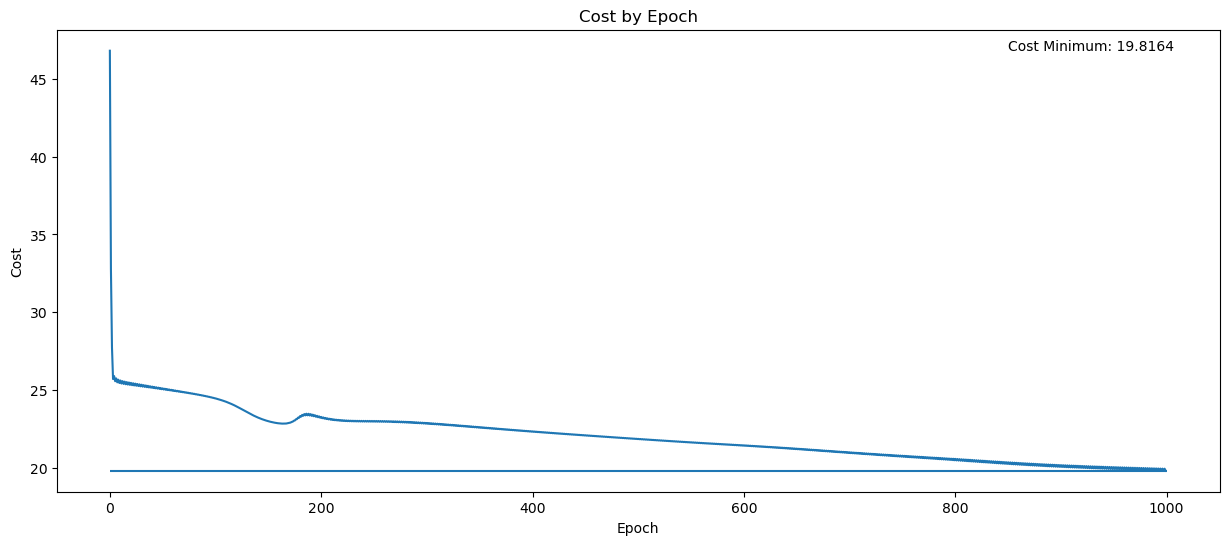

In [9]:
plt.figure(figsize = (15, 6))
plt.plot(cost)
plt.hlines(min(cost), 0, epoch)
plt.text(epoch - 150, max(cost), 'Cost Minimum: %.4f' % min(cost))
plt.title('Cost by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

## Create new data and re-run
Create new data and re-run from **Weights and Bias**.

In [10]:
X = np.random.binomial(1, 0.7, (100, 7))
y = np.random.binomial(1, 0.5, (X.shape[0], 1))

input_layer_size = X.shape[1]
hidden_layer_1_size = 5

In [11]:
y

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



